# Part 03 BD-e2 Machine Learning

In section 02, we prepared out dataset by reconciling the multicolinearity within our dataset and conducting a cluster analysis identify which records are not unique.

1. Open GEDI csv table
2. Subset Data by Sil-Width (New)
3. Prepare Data for ML Testing
4. Testing Multiple Algorithms
5. Tunining Selected Model with Optuna
6. Selcting most importance features

# Install Packages

Install python packages that we will need for data exploration and Machine Learning

In [ ]:
from scipy import stats
from sklearn import model_selection, metrics 
import joblib
import time

# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import warnings
import datetime
import shap
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, root_mean_squared_error
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import silhouette_score, silhouette_samples

## Load Data
Load CSV from Data Preparation Part 02

In [17]:
### *********** 20241127 added Ownership*******************
outPathCSV = "D:/TO17/^^ExtraExtra/GEDI/HpmGuideMod/tables/GEDI_Kenobi_Prepared_Table_mlReady_20250326.csv"
#Merged_Obiwan_pts_2022_2019_OutliersRemoved_MoransPositive_byYear
masterdf = pd.read_csv(outPathCSV)


In [18]:
masterdf

,silWidth,clusterLabel,DouglasFir,EVI,FabDEM,HStF,NBR,NDMI,Other_Hardwood,Red_Alder,...,EVI_sent,EVI_var,HeatLoadIndex,Ownership,gnn,GLI,ExBlue,ExGreen,ExRed,clusterLabelStr
0,0.016793,1,0,4758,200,0,5849,4039,0,0,...,30905,420,10896,Federal_Govt,Red_Cedar,584.389048,2571.825507,-397.332592,545.151431,second
1,0.087333,2,0,7151,679,0,6782,4627,0,1,...,1450,16,8828,State_Govt,Red_Alder,508.779829,2646.717557,-345.038168,410.992366,third
2,0.055864,1,0,1507,941,1,2799,722,0,0,...,21471,242,8936,Industry,HStF,1179.039301,2861.818182,-818.181818,732.121212,second
3,-0.017801,1,0,6336,871,1,6230,3888,0,0,...,17428,277,8466,Industry,HStF,555.308752,2626.433313,-377.187689,467.712734,second
4,0.093408,2,0,7014,1049,1,7007,5128,0,0,...,2323,7,7598,State_Govt,HStF,529.709811,2804.001250,-359.487340,270.084401,third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,0.109556,0,1,5720,2203,0,8034,5201,0,0,...,30438,365,9037,State_Govt,DouglasFir,347.284061,3471.471471,-234.234234,-539.339339,first
17246,0.185058,0,1,5537,765,0,8019,5477,0,0,...,28053,43,8852,Private,DouglasFir,171.325518,3374.848851,-114.873035,-577.992745,first
17247,0.165451,0,1,5091,767,0,7792,5134,0,0,...,28177,43,8618,Private,DouglasFir,213.903743,3350.089767,-143.626571,-520.646320,first
17248,0.129936,0,1,5777,850,0,8141,5632,0,0,...,25876,96,8526,Industry,DouglasFir,115.555556,3305.175491,-77.334920,-550.862582,first


In [222]:
masterdf['silWidth'].describe()

count    17250.000000
mean         0.074582
std          0.080900
min         -0.205782
25%          0.023393
50%          0.068626
75%          0.114764
max          0.481214
Name: silWidth, dtype: float64

In [225]:
round(0.074582-(0.080900/2),4)

0.0341

### Subset Data by SilWidth

In [226]:
masterdfprepped = masterdf[(masterdf['silWidth']>=0.0341)]
masterdfprepped

,silWidth,clusterLabel,DouglasFir,EVI,FabDEM,HStF,NBR,NDMI,Other_Hardwood,Red_Alder,...,EVI_sent,EVI_var,HeatLoadIndex,Ownership,gnn,GLI,ExBlue,ExGreen,ExRed,clusterLabelStr
1,0.087333,2,0,7151,679,0,6782,4627,0,1,...,1450,16,8828,State_Govt,Red_Alder,508.779829,2646.717557,-345.038168,410.992366,third
2,0.055864,1,0,1507,941,1,2799,722,0,0,...,21471,242,8936,Industry,HStF,1179.039301,2861.818182,-818.181818,732.121212,second
4,0.093408,2,0,7014,1049,1,7007,5128,0,0,...,2323,7,7598,State_Govt,HStF,529.709811,2804.001250,-359.487340,270.084401,third
5,0.168431,3,0,9958,568,0,7947,5047,0,1,...,28444,211,8914,Industry,Red_Alder,-2330.935252,1874.499332,1441.922563,-842.011571,fourth
6,0.172306,4,0,8674,521,1,8239,5849,0,0,...,26985,315,9301,Industry,HStF,-644.216691,2740.563784,420.449116,-550.406116,fifth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17245,0.109556,0,1,5720,2203,0,8034,5201,0,0,...,30438,365,9037,State_Govt,DouglasFir,347.284061,3471.471471,-234.234234,-539.339339,first
17246,0.185058,0,1,5537,765,0,8019,5477,0,0,...,28053,43,8852,Private,DouglasFir,171.325518,3374.848851,-114.873035,-577.992745,first
17247,0.165451,0,1,5091,767,0,7792,5134,0,0,...,28177,43,8618,Private,DouglasFir,213.903743,3350.089767,-143.626571,-520.646320,first
17248,0.129936,0,1,5777,850,0,8141,5632,0,0,...,25876,96,8526,Industry,DouglasFir,115.555556,3305.175491,-77.334920,-550.862582,first


<Axes: xlabel='agbd', ylabel='Count'>

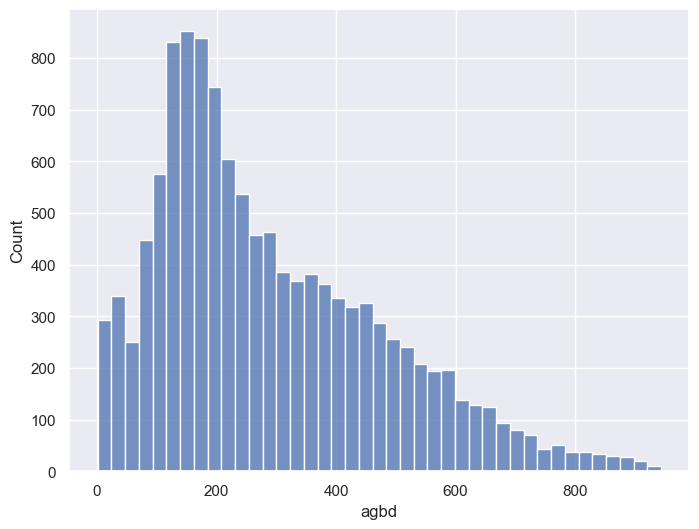

In [227]:
sns.histplot(masterdfprepped['agbd'])

### Drop all ancillary Columns from Data
These are ancillary information and can't be used in model development. This should result in 56 Columns

In [228]:
colDrop = ['clusterLabel','clusterLabelStr','Ownership','gnn','silWidth','lat','lon','uniqid']
masterdfprepped = masterdfprepped.drop(columns = colDrop)
print(len(masterdfprepped.columns))

53


In [229]:
list(masterdfprepped.columns)

['DouglasFir',
 'EVI',
 'FabDEM',
 'HStF',
 'NBR',
 'NDMI',
 'Other_Hardwood',
 'Red_Alder',
 'Red_Cedar',
 'SAVI',
 'agbd',
 'brightness',
 'cosAspect',
 'green',
 'greenness',
 'nir',
 'nonForestType',
 'notHarvestable',
 'red',
 'sinAspect',
 'slope',
 'swir1',
 'swir2',
 'tcAngleBG',
 'tcAngleBW',
 'tcAngleGW',
 'tcDistBG',
 'tcDistBW',
 'tcDistBW_asm',
 'tcDistBW_corr',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_var',
 'tcDistGW',
 'tpi11',
 'tpi21',
 'tpi41',
 'wetness',
 'EVI_asm',
 'EVI_corr',
 'EVI_idm',
 'EVI_imcorr1',
 'EVI_savg',
 'EVI_sent',
 'EVI_var',
 'HeatLoadIndex',
 'GLI',
 'ExBlue',
 'ExGreen',
 'ExRed']

### Split Data into X And Y datasets


In [230]:
Xdf = masterdfprepped.drop(columns = ['agbd'])
ydf = masterdfprepped['agbd']                             

In [231]:
Xdf.columns

Index(['DouglasFir', 'EVI', 'FabDEM', 'HStF', 'NBR', 'NDMI', 'Other_Hardwood',
       'Red_Alder', 'Red_Cedar', 'SAVI', 'brightness', 'cosAspect', 'green',
       'greenness', 'nir', 'nonForestType', 'notHarvestable', 'red',
       'sinAspect', 'slope', 'swir1', 'swir2', 'tcAngleBG', 'tcAngleBW',
       'tcAngleGW', 'tcDistBG', 'tcDistBW', 'tcDistBW_asm', 'tcDistBW_corr',
       'tcDistBW_idm', 'tcDistBW_imcorr1', 'tcDistBW_imcorr2', 'tcDistBW_savg',
       'tcDistBW_sent', 'tcDistBW_var', 'tcDistGW', 'tpi11', 'tpi21', 'tpi41',
       'wetness', 'EVI_asm', 'EVI_corr', 'EVI_idm', 'EVI_imcorr1', 'EVI_savg',
       'EVI_sent', 'EVI_var', 'HeatLoadIndex', 'GLI', 'ExBlue', 'ExGreen',
       'ExRed'],
      dtype='object')

## Subset to Most Important Variables

In [286]:
# #Current GOLD

# impFeatures = [
#       'tcAngleBG',
#       'slope',
#       'FabDEM',
#       'cosAspect',
#       'tcDistBW',
#       'sinAspect',
#       'EVI_savg',
#       'tcDistBG',
#       'brightness',
#       'tpi41',
#       'NDMI',
#       'ExBlue',
#       'greenness',
#       'GLI',
#       'HStF',
#       'DouglasFir',
#       'EVI_var',
#       'NBR',
#       'tpi11',
#       'tcAngleBW',
#       'wetness',
#       'EVI_corr',
#       'EVI_idm',
#       'EVI_sent',
#       'tcAngleGW',
#       'tpi21',
#       'tcDistGW',
#       'EVI_asm',
#       'Red_Alder',
#       'Other_Hardwood',
#       'Red_Cedar',
#       'notHarvestable',
#       'nonForestType',
      
#       'tcDistBW_asm',
#       'tcDistBW_savg',
#       'tcDistBW_var',
#       'tcDistBW_corr',
#       'tcDistBW_idm',
#       'tcDistBW_sent',
      
#       'HeatLoadIndex',
    
          
# ]

In [287]:
#Testing

impFeatures = [
    'tcAngleBG',
    'slope',
    'tcDistBW_savg',
    'cosAspect',
    'FabDEM',
    'tcDistBW',
    'tcDistBG',
    'sinAspect',
    'greenness',
    'NDMI',
    'tpi41',
    'brightness',
    'NBR',
    'GLI',
    'tcDistBW_var',
    'HStF',
    'ExBlue',
    'DouglasFir',
    'tcDistBW_idm',
    'tcDistBW_corr',
    'tcDistGW',
    'tpi11',
    'EVI_savg',
    'EVI_var',
    'wetness',
    'tcDistBW_sent',
    'tpi21',
    'tcAngleGW',
    'EVI_sent',
    'HeatLoadIndex',
    'EVI_corr',
    'gnn',
    'Ownership'

]


impFeaturesTrue = [
    'tcAngleBG',
    'slope',
    'tcDistBW_savg',
    'cosAspect',
    'FabDEM',
    'tcDistBW',
    'tcDistBG',
    'sinAspect',
    'greenness',
    'NDMI',
    'tpi41',
    'brightness',
    'NBR',
    'GLI',
    'tcDistBW_var',
    'HStF',
    'ExBlue',
    'DouglasFir',
    'tcDistBW_idm',
    'tcDistBW_corr',
    'tcDistGW',
    'tpi11',
    'EVI_savg',
    'EVI_var',
    'wetness',
    'tcDistBW_sent',
    'tpi21',
    'tcAngleGW',
    'EVI_sent',
    'HeatLoadIndex',
    'EVI_corr',
]


impFeaturesJoinBack = [
    'gnn',
    'Ownership'

]






In [289]:
Xdf = Xdf[impFeatures]#.astype(np.int16)

In [290]:
Xdf

,tcAngleBG,slope,tcDistBW_savg,cosAspect,FabDEM,tcDistBW,tcDistBG,sinAspect,greenness,NDMI,...,EVI_var,wetness,tcDistBW_sent,tpi21,tcAngleGW,EVI_sent,HeatLoadIndex,EVI_corr,gnn,Ownership
1,701,-8780,142,-27760,2000,3066,3141,-31984,687,4039,...,420,-82,27019,-940,-378,30905,10896,3165,Red_Cedar,Federal_Govt
2,1259,-12436,27,-29968,6790,3472,3761,-13232,1449,4627,...,16,-126,1512,380,-277,1450,8828,685,Red_Alder,State_Govt
3,-62,-17208,105,5472,9410,2474,2433,13328,-48,722,...,242,-453,20055,1540,-5336,21471,8936,1093,HStF,Industry
4,1084,-19472,101,-27936,8710,3369,3563,13920,1190,3888,...,277,-265,16105,-240,-698,17428,8466,-575,HStF,Industry
5,1220,26164,42,-10512,10490,3186,3436,-26864,1285,5128,...,7,21,3371,-480,54,2323,7598,1205,HStF,State_Govt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17283,1722,-136,97,26048,22030,2090,2438,28784,1256,5201,...,365,-30,29997,-2550,-78,30438,9037,640,DouglasFir,State_Govt
17284,1713,24200,99,16368,7650,2032,2367,-31600,1213,5477,...,43,8,25572,-650,22,28053,8852,503,DouglasFir,Private
17285,1604,-26836,99,28672,7670,1951,2228,-9440,1076,5134,...,43,-26,25925,-770,-78,28177,8618,566,DouglasFir,Private
17286,1755,26200,113,-24896,8500,2113,2481,9760,1300,5632,...,96,30,28294,830,75,25876,8526,-39,DouglasFir,Industry


In [291]:
# Xdf.to_csv('E:\\GEDI\\EndGame\\Tables\\modelValidation\\GEDI_EE_TableValidation_v2.csv')

In [292]:
# Xdf = Xdf.drop (columns =[
#     'ALOS_Chili_HeatLoad',
#                            'NDPI',
#  'NDII',
# #  'NDSI',                
#  'IPCA',
#  'GLI',
#  'ExBlue',
#  'ExGreen',
#  'ExRed',
#  'saturation',
#  'sinHue',
#  'cosHue',
# 'foldedAspect_NE_SW',
#  'foldedAspect_N_S',
# 'NorthnessExposure',
#   'EastnessExposure',                       
# ])

In [293]:
list(Xdf.columns)

['tcAngleBG',
 'slope',
 'tcDistBW_savg',
 'cosAspect',
 'FabDEM',
 'tcDistBW',
 'tcDistBG',
 'sinAspect',
 'greenness',
 'NDMI',
 'tpi41',
 'brightness',
 'NBR',
 'GLI',
 'tcDistBW_var',
 'HStF',
 'ExBlue',
 'DouglasFir',
 'tcDistBW_idm',
 'tcDistBW_corr',
 'tcDistGW',
 'tpi11',
 'EVI_savg',
 'EVI_var',
 'wetness',
 'tcDistBW_sent',
 'tpi21',
 'tcAngleGW',
 'EVI_sent',
 'HeatLoadIndex',
 'EVI_corr',
 'gnn',
 'Ownership']

In [233]:
len(masterdfprepped)

12012

In [234]:
list(Xdf.columns)

['DouglasFir',
 'EVI',
 'FabDEM',
 'HStF',
 'NBR',
 'NDMI',
 'Other_Hardwood',
 'Red_Alder',
 'Red_Cedar',
 'SAVI',
 'brightness',
 'cosAspect',
 'green',
 'greenness',
 'nir',
 'nonForestType',
 'notHarvestable',
 'red',
 'sinAspect',
 'slope',
 'swir1',
 'swir2',
 'tcAngleBG',
 'tcAngleBW',
 'tcAngleGW',
 'tcDistBG',
 'tcDistBW',
 'tcDistBW_asm',
 'tcDistBW_corr',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_var',
 'tcDistGW',
 'tpi11',
 'tpi21',
 'tpi41',
 'wetness',
 'EVI_asm',
 'EVI_corr',
 'EVI_idm',
 'EVI_imcorr1',
 'EVI_savg',
 'EVI_sent',
 'EVI_var',
 'HeatLoadIndex',
 'GLI',
 'ExBlue',
 'ExGreen',
 'ExRed']

### Apply Transformation
Transforming the taget variable can often result in improved model performance. Typical transforms include 'square root', 'log', and 'log10'. We will transform the data using 'log'

count    12012.000000
mean         5.390107
std          0.881996
min          0.000000
25%          4.976734
50%          5.480639
75%          6.016157
max          6.850126
Name: agbd, dtype: float64


<Axes: xlabel='agbd', ylabel='Count'>

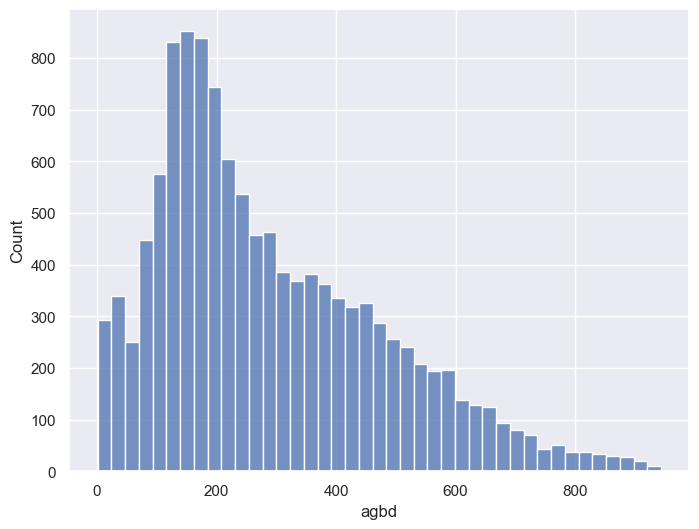

In [232]:
ydf_log = np.log(ydf)
print(ydf_log.describe())

sns.histplot(ydf)

In [235]:
gMean = stats.gmean(ydf)
yMean = ydf.mean()

224.308763663772 * 0.34010048710261087 

76.28751978343328

5.390106850295962


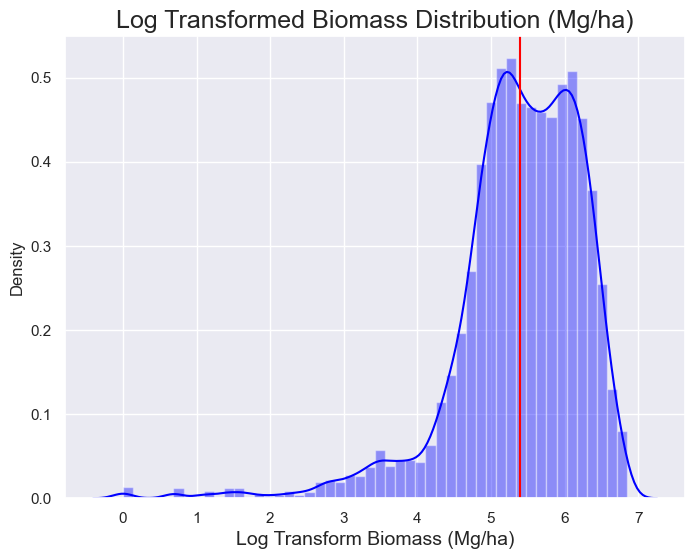

In [236]:
# x = shapefile['agbd_1'].values   # agbd_update is GNN:1 = gdb = Lower, GNN: 2 = Upper, GNN 3: Mean // agbd_1 #shapefile

sns.distplot(ydf_log, color = 'blue');

# Calculating the mean
mean = ydf_log.mean()
print(mean)

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

plt.title("Log Transformed Biomass Distribution (Mg/ha)", fontsize=18)
plt.xlabel("Log Transform Biomass (Mg/ha)", fontsize=14)

plt.show()


0.44804751754148237


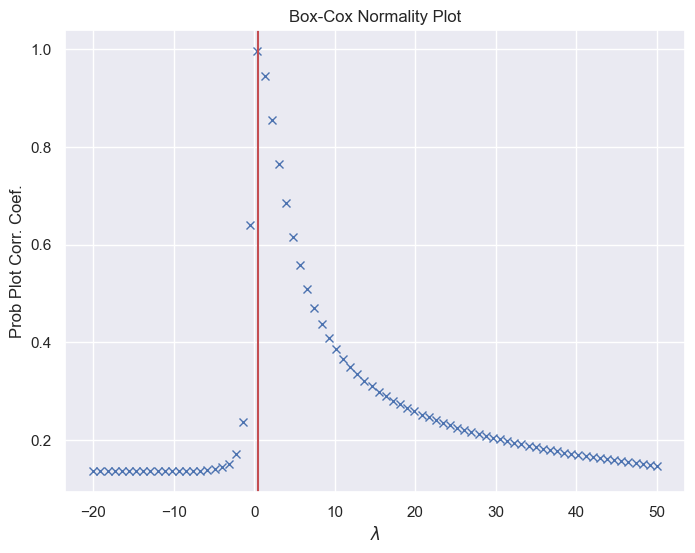

In [237]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(ydf,-20,50, plot= ax)

_, maxlog = stats.boxcox(ydf)
ax.axvline(maxlog,color='r')

print(maxlog)

## FIX ME LATER!!!!

In [45]:
len(Xdf.columns)

52

## Example Distribution of Variables

In [155]:
# import statsmodels.api as sm

In [ ]:
# # # identifying all numeric columns
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# n_variables = Xdf.select_dtypes(include=numerics).columns

# # # Increases the size of sns plots
# # sns.set(rc={'figure.figsize':(8,5)})


# # for n in n_variables:
# #     x = Xdf_no_corr[n].values
# # #     sns.distplot(x, color = 'blue');
# #     sns.boxplot(x, color = 'blue');

# # #     sm.qqplot(x, dist = stats.norm, fit=True, line = 'q')

# #     # Calculating the mean
# #     mean = Xdf_no_corr[n].mean()

# # #     #ploting the mean
# # #     plt.axvline(mean, 0,1, color = 'red')
# #     plt.title(n)
# # #     plt.show()

# for c in n_variables:    
#     x = Xdf[c].values
#     ax = sns.boxplot(x, color = '#D1EC46')
#     print('The median is: ', Xdf[c].median())
#     plt.title(c)
#     plt.show()
    

# Modeling

### Spliting the Data
The Conduct the modeling, we need to split the data in a training and test dataset. We will use a 80:20 split while ensuring the statisatical variance is as close to zeero as possible

In [238]:
# import a library for spliting data into random train and test subsets
from sklearn.model_selection import train_test_split
import statistics

def findRandomState(x_data, y_data, thres):
    randomState = 1
    diff = 10
    yield randomState, diff
    while diff > thres:
        randomState += 1
#         print(randomState)
        print(f'---Random State equals {randomState}')
        X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=randomState) #ydf_log,#248 #218,#18 #28, 68, 128, 428 #Xdf or Xdf_no_corr
        # import a library for spliting data into random train and test subsets
        diff = abs((statistics.variance(y_train))-(statistics.variance(y_test)))
#         diff = diff2
        print(round(diff,4))
#         if diff > 0.002:
#             j+=1
        yield randomState, diff

    
for randomState, thres in findRandomState(Xdf, ydf_log,0.0001):
    print('\n')

# for randomState, thres in findRandomState(Xdf, ydf,5):
#     print('\n')





---Random State equals 2
0.0093


---Random State equals 3
0.051


---Random State equals 4
0.0512


---Random State equals 5
0.034


---Random State equals 6
0.0417


---Random State equals 7
0.0785


---Random State equals 8
0.0229


---Random State equals 9
0.0026


---Random State equals 10
0.0003


---Random State equals 11
0.0932


---Random State equals 12
0.0606


---Random State equals 13
0.0208


---Random State equals 14
0.0138


---Random State equals 15
0.0627


---Random State equals 16
0.0646


---Random State equals 17
0.0237


---Random State equals 18
0.0542


---Random State equals 19
0.0031


---Random State equals 20
0.0286


---Random State equals 21
0.0338


---Random State equals 22
0.0119


---Random State equals 23
0.0861


---Random State equals 24
0.0279


---Random State equals 25
0.1126


---Random State equals 26
0.0341


---Random State equals 27
0.0374


---Random State equals 28
0.0025


---Random State equals 29
0.0358


---Random State equals 30
0.

The smallest variance occurs when random state equals 218.

In [239]:
# import a library for spliting data into random train and test subsets
from sklearn.model_selection import train_test_split
import statistics
# i.e. 80 % training dataset and 20 % test datasets
X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf_log, test_size = 0.2, random_state=394) #100#rs: 196 #ydf_log,#248 #218,#18 #28, 68, 128, 428 #Xdf or Xdf_no_corr #536
# import a library for spliting data into random train and test subsets

# ---- random state 438 ---#
X_train.shape
X_test.shape
y_train.shape
y_test.shape
print("y Train Var",statistics.variance(y_train))
print("y Test Var",statistics.variance(y_test))
diff = (statistics.variance(y_train))-(statistics.variance(y_test))
#         diff = diff2
print('Variance Difference',round(diff,4))

y Train Var 0.7779732838074063
y Test Var 0.777969538999049
Variance Difference 0.0


In [51]:
X_train

,DouglasFir,EVI,FabDEM,HStF,NBR,NDMI,Other_Hardwood,Red_Alder,Red_Cedar,SAVI,...,EVI_idm,EVI_imcorr1,EVI_savg,EVI_sent,EVI_var,HeatLoadIndex,GLI,ExBlue,ExGreen,ExRed
16223,1,8601,6782,0,8373,6090,0,0,0,4873,...,924,-7002,452,29633,128,9754,172.185430,3189.165187,-115.452931,-391.651865
11691,1,7689,8152,0,8369,5860,0,0,0,5147,...,1179,-7124,428,29116,109,10752,-1443.755536,2441.690141,918.309859,-815.774648
8161,1,5483,2535,0,7571,5009,0,0,0,3673,...,1267,-7040,401,28889,126,8447,-206.540448,2954.985755,136.752137,-443.304843
12415,1,6568,5684,0,7978,5280,0,0,0,4231,...,1578,-5897,437,27252,29,5413,-1419.753086,2347.740668,903.732809,-705.304519
3116,1,7414,1098,0,8557,6132,0,0,0,4676,...,1519,-6140,448,27724,43,8908,-295.358650,3153.203343,194.986072,-707.520891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,1,4772,8300,0,8313,5701,0,0,0,3360,...,1061,-6810,362,28931,62,3882,-357.894737,3199.722607,235.783634,-800.277393
1033,0,7237,8707,1,7919,5438,0,0,0,4866,...,1607,-5887,425,26788,28,10990,-1171.314741,2270.961145,751.533742,-456.032720
16117,1,6926,7220,0,8322,5739,0,0,0,4659,...,1645,-6017,423,27366,35,6484,-1423.423423,2497.706422,905.963303,-857.798165
12358,1,8874,1171,0,7735,5175,0,0,0,5558,...,1712,-5696,482,26883,33,9616,-1157.752200,2241.634072,743.155150,-417.209909


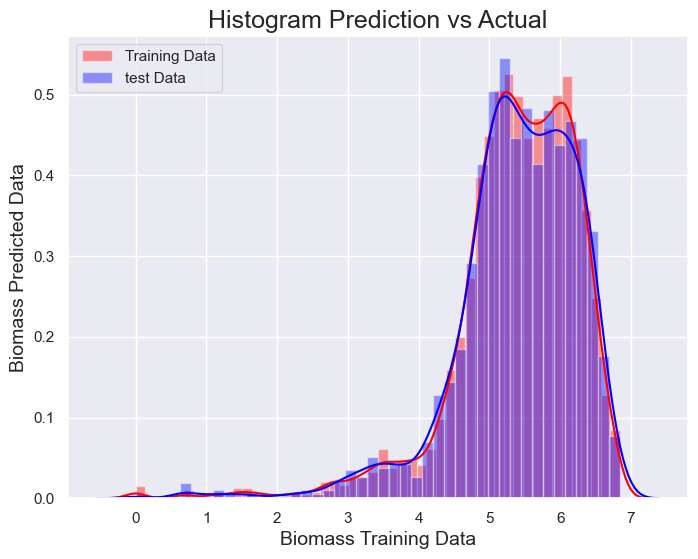

In [375]:
plt.figure() #plt.figure(figsize=(14,8))

sns.distplot(y_train,color='red', label = "Training Data")
sns.distplot(y_test,color='blue', label = "test Data")

plt.title("Histogram Prediction vs Actual", fontsize=18)
plt.xlabel("Biomass Training Data", fontsize=14)
plt.ylabel("Biomass Predicted Data", fontsize=14)

plt.legend()

plt.show()

In [241]:
from mlxtend.evaluate import bias_variance_decomp

In [242]:
geoMean = stats.gmean(ydf)
geoMean

219.22680875194237

## Test All models at once

Multiple machine learning (ML) algorithms can be used in developing the model. Here, we will test which ML models perform the best 'out of the box' and records the MAE, RMSE, R2, Bias, and run time. Results are based on a 50-fold cross validation. Tested models include

- Lasso Regression
- Support Vector Regression
- Random Forest
- Light GBM

In [244]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgbm
# import xgboost as xg

# import catboost as cb

SVM_Regression = SVR()

np.random.seed(42)


#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    start_time = time.time()
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=RobustScaler()) #transformer=QuantileTransformer(output_distribution='normal')
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    yhat_train = regr_trans.predict(X_train)
    bias00 = y_test - yhat
    bias01 = np.mean(yhat) - np.mean(y_test) 
#     var = 
    mean = np.mean(ydf)
    geoMean = stats.gmean(ydf)
    print(geoMean,"GeoMean")
    mse, bias, var = bias_variance_decomp(regr_trans, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=50, random_seed=42)
    trainScore = regr_trans.score(X_train, y_train)
    algoname= x.__class__.__name__
    return algoname, round(mean,3),round(geoMean,3),round(r2_score(y_test, yhat),3),round(trainScore,3), round(mean_absolute_error(y_test, yhat)*geoMean,3), round((mean_absolute_error(y_test, yhat)*geoMean/geoMean)*100,3),round(np.mean(np.abs(bias))*geoMean,3),round(np.mean(var)*geoMean,3), round(time.time() - start_time, 3) 
# lgbm.LGBMRegressor(boosting='dart')
# lgbm_model
algo=[Lasso(), SVR(), lgbm.LGBMRegressor(), RandomForestRegressor()] ##, cb.CatBoostRegressor(silent=True,loss_function='RMSE')
# algo=[Lasso()] ##, cb.CatBoostRegressor(silent=True,loss_function='RMSE')
score=[]
for a in algo:
    score.append(boost_models(a))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model','Mean','GeoMean' ,'R2 Pred','R2 Train', 'MAE', '%MAE','Bias', 'Variance','Run Time (sec)'])

219.22680875194237 GeoMean
219.22680875194237 GeoMean
219.22680875194237 GeoMean
219.22680875194237 GeoMean


,Model,Mean,GeoMean,R2 Pred,R2 Train,MAE,%MAE,Bias,Variance,Run Time (sec)
0,Lasso,289.356,219.227,0.655,0.669,90.217,41.152,58.618,0.243,20.917
1,SVR,289.356,219.227,0.690,0.692,84.455,38.524,52.843,0.354,313.083
2,LGBMRegressor,289.356,219.227,0.760,0.836,72.940,33.271,39.726,2.500,13.442
3,RandomForestRegressor,289.356,219.227,0.756,0.891,74.181,33.837,41.548,2.162,1720.258


Based on these results, LightGBM and Random Forest preformed very similiarly reaching 74.6% and 73.8% respectively. LightGBM slightly outperforms Random forest and is what we will use moving forward

## Deploy LightGBM Model


In [243]:
# importing Extreme Gradient Boosting from assemble module
import lightgbm as lgbm
# from sklearn.metrics import plot_confusion_matrix

# # creating a RF classifier
lgbm_model = lgbm.LGBMRegressor()



# lgbm_model = lgbm.LGBMRegressor( boosting='dart ', #dart, #gbdt
#                                 n_estimators = 200,
#                                 skip_drop=.7, 
#                                 objective = "regression",#"rmse",#"rmse",
#                                 metric = "rmse",#"auto", #rmse
# #                                 use_missing = False,
# # #                                  bagging_freq=2,
# #                                  learning_rate=0.0969578156634451,
# #                                  num_leaves=50,
# #                                  max_depth =9,
# #                                  subsample =0.36757723146090926,
# #                                  colsample_bytree = 0.8510828195820848
#                                ) #boosting='gbdt'#objective='mse', seed=8798, num_threads=1

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
 
# performing predictions on the test dataset
y_pred_lgbm = lgbm_model.predict(X_test)

y_pred_train_lgbm = lgbm_model.predict(X_train)

# y_pred_full_lgbm = lgbm_model.predict(Xdf_no_corr)


# Accuracy
from sklearn import metrics 
# from sklearn.linear_model import LinearRegression


# Accuracy on Test
print("\nTraining Accuracy is: ", lgbm_model.score(X_train, y_train))
# rms_xgbTrain = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
# print('RMSE associated with XGBoost Regression is:', rms_xgbTrain)
# mae_xgbTrain = metrics.mean_absolute_error(y_train, y_pred_train)
# print('MAE associated with XGBoost Regression is:', mae_xgbTrain)


# Accuracy on Train
print("Testing Accuracy is: ", lgbm_model.score(X_test, y_test))


r_square_xgb = metrics.r2_score(y_test,y_pred_lgbm)
print('R-Square Error associated with LightGBM Regression is:', r_square_xgb)
rms_xgb = metrics.mean_squared_error(y_test, y_pred_lgbm, squared=False)
print('RMSE associated with LightGBM Regression is:', rms_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_lgbm)
print('MAE associated with LightGBM Regression is:', mae_xgb)

print('Mean agbd Value:',np.mean(ydf_log))


Training Accuracy is:  0.8657460838375854
Testing Accuracy is:  0.7604092825414726
R-Square Error associated with LightGBM Regression is: 0.7604092825414726
RMSE associated with LightGBM Regression is: 0.4316441968629717
MAE associated with LightGBM Regression is: 0.3327126826425943
Mean agbd Value: 5.390106850295962


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='rmse'>

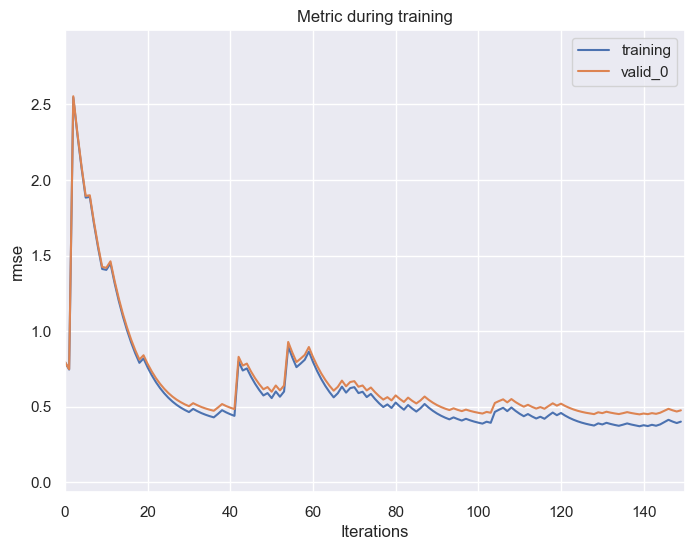

In [94]:
lgbm.plot_metric(lgbm_model)

### Model Tuning with Optuna
Model performance can often be improved when modifying the default parameters. We will use the Optuna package to tune the parameter in our currently LightGBM Model

Furthermore, we will incorperate DART boosting to minimize the influence of overfitting in the dataset

Note: This is an iterative process and may not result in improved model performance

https://medium.com/@sarahzouinina/a-deep-dive-into-lightgbm-how-to-choose-and-tune-parameters-7c584945842e



In [471]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
# from optuna.samplers import TPESampler
import optuna
from optuna.samplers import TPESampler

# 1 tune min_data_in_leaf


def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": 'dart', #gbdt #dart
        "skip_drop": trial.suggest_float("skip_drop", 0.60, 0.95,step=0.01),
        "n_estimators": trial.suggest_int("n_estimators",50,500,step=10),
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.8, log=True), ### YES
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10), ### YES
        "max_depth": trial.suggest_int("max_depth", 1, 12), ### YES
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),  ### YES
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 200),
# #         "early_stopping_rounds":10,
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),

        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),

    }
    
    #'learning_rate': 0.09730213213959626

    model = lgbm.LGBMRegressor(**params)
#     model.fit(X_train, y_train, verbose=False)
#     predictions = model.predict(X_test)
#     r2 = metrics.r2_score(y_test,predictions)
#     score = mean_squared_error(y_test, predictions, squared=False)

    score = -np.mean(cross_val_score(estimator = model, X=X_train,y=y_train,scoring='neg_root_mean_squared_error', cv =5))
    # score = np.mean(cross_val_score(estimator = model, X=X_train,y=y_train,scoring='r2', cv =5))
    return score

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='minimize', sampler=sampler) #optuna.samplers.RandomSampler(seed= 42) #minimized is used because we want the smallest RMSE
# study = optuna.create_study(direction='maximize', sampler=sampler) #optuna.samplers.RandomSampler(seed= 42) #minimized is used because we want the smallest RMSE
study.optimize(objective, n_trials=100)

[I 2025-03-28 10:24:13,183] A new study created in memory with name: no-name-cb665432-a805-401d-a091-353822795eb1
[I 2025-03-28 10:24:14,394] Trial 0 finished with value: 1.4789092291037644 and parameters: {'skip_drop': 0.85, 'n_estimators': 180, 'learning_rate': 0.004555858043396975, 'num_leaves': 565, 'max_depth': 9, 'subsample': 0.45195113711823787, 'lambda_l1': 6.712399331356397, 'lambda_l2': 0.014570271595538578, 'colsample_bytree': 0.5068853064101428, 'min_data_in_leaf': 90, 'bagging_fraction': 0.6059068096905217, 'bagging_freq': 6, 'feature_fraction': 0.6631433468077746}. Best is trial 0 with value: 1.4789092291037644.
[I 2025-03-28 10:24:15,841] Trial 1 finished with value: 0.4486918545305102 and parameters: {'skip_drop': 0.62, 'n_estimators': 230, 'learning_rate': 0.13882480522779336, 'num_leaves': 188, 'max_depth': 3, 'subsample': 0.5549738051497465, 'lambda_l1': 0.0006115729720282377, 'lambda_l2': 0.005123994170264194, 'colsample_bytree': 0.8569602043739001, 'min_data_in_lea

##### Simple Tuning

In [457]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score
# from lightgbm import early_stopping
# # from optuna.samplers import TPESampler
# import optuna
# from optuna.samplers import TPESampler

# # 1 tune min_data_in_leaf


# def objective(trial):
#     params = {
#         "objective": "regression",
#         "metric": "rmse",
#         "boosting_type": 'dart', #gbdt #dart
#         "skip_drop": trial.suggest_float("skip_drop", 0.60, 0.95,step=0.01),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 50),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 50),
#         'feature_fraction': trial.suggest_uniform('feature_fraction', 0.7, 1.0),

#     }
    
#     #'learning_rate': 0.09730213213959626

#     model = lgbm.LGBMRegressor(**params)
#     model.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[early_stopping(stopping_rounds=100)])
#     preds = model.predict(X_test)
#     score = root_mean_squared_error(y_test, preds)
#     return score

#     # score = -np.mean(cross_val_score(estimator = model, X=X_train,y=y_train,scoring='neg_root_mean_squared_error', cv =5))
#     # # score = np.mean(cross_val_score(estimator = model, X=X_train,y=y_train,scoring='r2', cv =5))
#     # return score

# sampler = TPESampler(seed=123)
# study = optuna.create_study(direction='minimize', sampler=sampler) #optuna.samplers.RandomSampler(seed= 42) #minimized is used because we want the smallest RMSE
# # study = optuna.create_study(direction='maximize', sampler=sampler) #optuna.samplers.RandomSampler(seed= 42) #minimized is used because we want the smallest RMSE
# study.optimize(objective, n_trials=100)

[I 2025-03-28 10:14:57,082] A new study created in memory with name: no-name-c4838f11-ca6d-4c97-a3f8-4145fe3f98b3
[I 2025-03-28 10:14:58,135] Trial 0 finished with value: 1.5863071840137424 and parameters: {'skip_drop': 0.85, 'n_estimators': 214, 'learning_rate': 0.002842515929299161, 'num_leaves': 37, 'max_depth': 8, 'min_data_in_leaf': 27, 'feature_fraction': 0.9942292595153847}. Best is trial 0 with value: 1.5863071840137424.
[I 2025-03-28 10:14:59,072] Trial 1 finished with value: 0.6959441756199385 and parameters: {'skip_drop': 0.84, 'n_estimators': 292, 'learning_rate': 0.006084642077147054, 'num_leaves': 30, 'max_depth': 8, 'min_data_in_leaf': 27, 'feature_fraction': 0.7179033689828704}. Best is trial 1 with value: 0.6959441756199385.
[I 2025-03-28 10:15:00,644] Trial 2 finished with value: 2.6282586446434353 and parameters: {'skip_drop': 0.74, 'n_estimators': 395, 'learning_rate': 0.002317306399075523, 'num_leaves': 25, 'max_depth': 7, 'min_data_in_leaf': 31, 'feature_fraction'

In [ ]:
# fig = optuna.visualization.plot_param_importances(study)
# fig.show()

In [472]:
print('Best hyperparameters:', study.best_params)
print('Best Score:', study.best_value)

Best hyperparameters: {'skip_drop': 0.83, 'n_estimators': 340, 'learning_rate': 0.05275231113572672, 'num_leaves': 152, 'max_depth': 10, 'subsample': 0.0710432687508035, 'lambda_l1': 1.4310188885647363e-05, 'lambda_l2': 1.3661478432401942e-07, 'colsample_bytree': 0.2593921671153686, 'min_data_in_leaf': 50, 'bagging_fraction': 0.9126244714973555, 'bagging_freq': 2, 'feature_fraction': 0.7174514341009092}
Best Score: 0.42410979730704657


In [473]:


bestParamDict08 = study.best_params
bestParamDict08

{'skip_drop': 0.83,
 'n_estimators': 340,
 'learning_rate': 0.05275231113572672,
 'num_leaves': 152,
 'max_depth': 10,
 'subsample': 0.0710432687508035,
 'lambda_l1': 1.4310188885647363e-05,
 'lambda_l2': 1.3661478432401942e-07,
 'colsample_bytree': 0.2593921671153686,
 'min_data_in_leaf': 50,
 'bagging_fraction': 0.9126244714973555,
 'bagging_freq': 2,
 'feature_fraction': 0.7174514341009092}

In [474]:
standardParams = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'dart'
}

In [475]:
bestParamDict08.update(standardParams)
bestParamDict08

{'skip_drop': 0.83,
 'n_estimators': 340,
 'learning_rate': 0.05275231113572672,
 'num_leaves': 152,
 'max_depth': 10,
 'subsample': 0.0710432687508035,
 'lambda_l1': 1.4310188885647363e-05,
 'lambda_l2': 1.3661478432401942e-07,
 'colsample_bytree': 0.2593921671153686,
 'min_data_in_leaf': 50,
 'bagging_fraction': 0.9126244714973555,
 'bagging_freq': 2,
 'feature_fraction': 0.7174514341009092,
 'objective': 'regression',
 'metric': 'rmse',
 'boosting_type': 'dart'}

### Update LightGBM Model with new Parameters


In [476]:
lgbm_final_model = lgbm.LGBMRegressor(**bestParamDict08)
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
lgbm_final_model.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
 
# performing predictions on the test dataset
y_pred_lgbm = lgbm_final_model.predict(X_test)

y_pred_train_lgbm = lgbm_final_model.predict(X_train)

# Accuracy
from sklearn import metrics 
# from sklearn.linear_model import LinearRegression


# Accuracy on Test
print("Training Accuracy is: ", lgbm_final_model.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", lgbm_final_model.score(X_test, y_test))


r_square_xgb = metrics.r2_score(y_test,y_pred_lgbm)
print('R-Square Error associated with LightGBM Regression is:', r_square_xgb)
rms_xgb = metrics.mean_squared_error(y_test, y_pred_lgbm, squared=False)
print('RMSE associated with LightGBM Regression is:', rms_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, y_pred_lgbm)
print('MAE associated with LightGBM Regression is:', mae_xgb)

print(np.mean(ydf_log))

Training Accuracy is:  0.9233304237863017
Testing Accuracy is:  0.771804562509309
R-Square Error associated with LightGBM Regression is: 0.771804562509309
RMSE associated with LightGBM Regression is: 0.421254342643388
MAE associated with LightGBM Regression is: 0.3273508762286279
5.390106850295962


In [479]:
from sklearn.model_selection import KFold
# Cross Validation
# Training data
score = np.mean(cross_val_score(estimator = lgbm_final_model, X=X_train,y=y_train,scoring='r2', cv =KFold(n_splits=10, shuffle=True)))
# Testing Data
score2 = np.mean(cross_val_score(estimator = lgbm_final_model, X=X_test,y=y_test,scoring='r2', cv=KFold(n_splits=10, shuffle=True)))

# Accuracy on Test
print("Training Accuracy is: ", score)
# Accuracy on Train
print("Testing Accuracy is: ", score2)

Training Accuracy is:  0.7683910447422353
Testing Accuracy is:  0.7344799640646377


Using a 10-fold cross validation, we found that the model achieves and Training R2 of 76.84 and Testing R2 of 73.45. The minimal differences in these results suggest the model performs well and does not overfit. 

The Final Parameters used are:
- 'objective': 'regression',
- 'metric': 'rmse',
- 'boosting_type': 'dart'
- skip_drop: 0.83,
- 'n_estimators': 340,
- 'learning_rate': 0.05275231113572672,
- 'num_leaves': 152,
- 'max_depth': 10,
- 'subsample': 0.0710432687508035,
- 'lambda_l1': 1.4310188885647363e-05,
- 'lambda_l2': 1.3661478432401942e-07,
- 'colsample_bytree': 0.2593921671153686,
- 'min_data_in_leaf': 50,
- 'bagging_fraction': 0.9126244714973555,
- 'bagging_freq': 2,
- 'feature_fraction': 0.7174514341009092,

Note: The parameters highlighted above are specifically tailored to the input training set and may not be optimal for other datasets

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='rmse'>

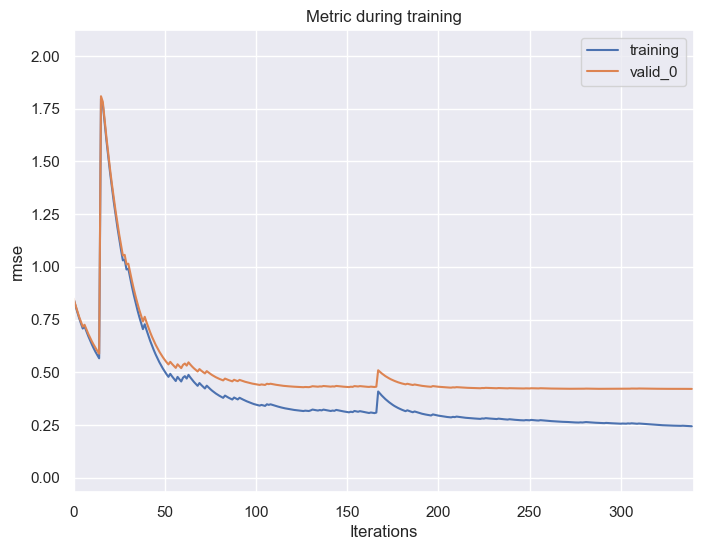

In [480]:
lgbm.plot_metric(lgbm_final_model)

In [481]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cliponaxis': False,
              'hovertemplate': [lambda_l2 (FloatDistribution):
                                1.9336521017632418e-05<extra></extra>, subsample
                                (FloatDistribution):
                                0.00027734258343579124<extra></extra>, n_estimators
                                (IntDistribution):
                                0.000507596655076316<extra></extra>, num_leaves
                                (IntDistribution):
                                0.000885956195694092<extra></extra>, max_depth
                                (IntDistribution):
                                0.0009641314714497254<extra></extra>, bagging_freq
                                (IntDistribution):
                                0.002571031550858296<extra></extra>,
                                min_data_in_leaf (IntDistribution):
                                0.0027678704202475698<extra></extra>,
                                colsample_bytree (FloatDistribution):
                                0.003075191843360381<extra></extra>, lambda_l1
                                (FloatDistribution):
                                0.004136660835018602<extra></extra>, skip_drop
                                (FloatDistribution):
                                0.007610662132049674<extra></extra>,
                                feature_fraction (FloatDistribution):
                                0.019119840588229752<extra></extra>,
                                bagging_fraction (FloatDistribution):
                                0.03446819730168126<extra></extra>, learning_rate
                                (FloatDistribution):
                                0.9235961819018809<extra></extra>],
              'name': 'Objective Value',
              'orientation': 'h',
              'text': [<0.01, <0.01, <0.01, <0.01, <0.01, <0.01, <0.01, <0.01,
                       <0.01, <0.01, 0.02, 0.03, 0.92],
              'textposition': 'outside',
              'type': 'bar',
              'x': [1.9336521017632418e-05, 0.00027734258343579124,
                    0.000507596655076316, 0.000885956195694092,
                    0.0009641314714497254, 0.002571031550858296,
                    0.0027678704202475698, 0.003075191843360381,
                    0.004136660835018602, 0.007610662132049674,
                    0.019119840588229752, 0.03446819730168126, 0.9235961819018809],
              'y': [lambda_l2, subsample, n_estimators, num_leaves, max_depth,
                    bagging_freq, min_data_in_leaf, colsample_bytree, lambda_l1,
                    skip_drop, feature_fraction, bagging_fraction, learning_rate]}],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})

### SHAP Feature Importance
Next, let's see which feature contribute the most to model performance. We will use Shap for this

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(lgbm_final_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

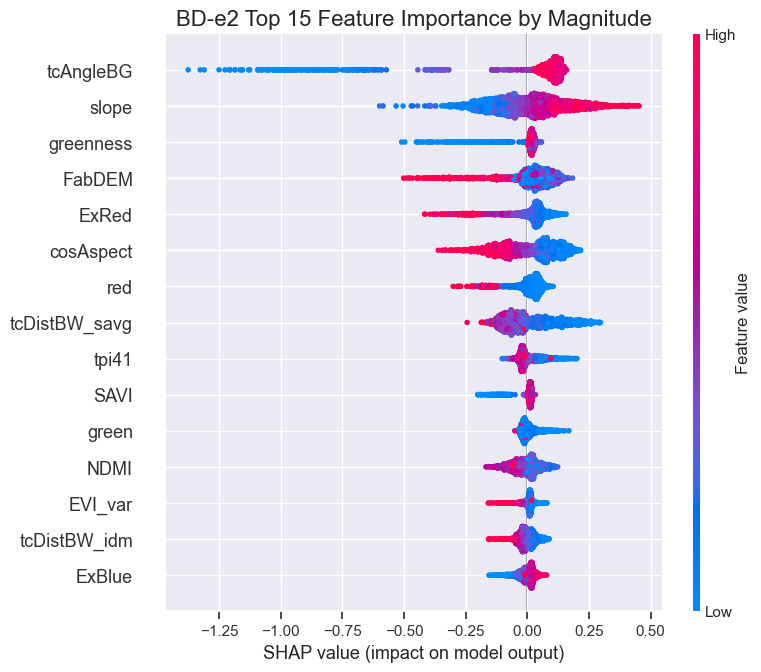

In [483]:
plt.title("BD-e2 Top 15 Feature Importance by Magnitude", fontsize=16)
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display = 15,group_remaining_features=False)

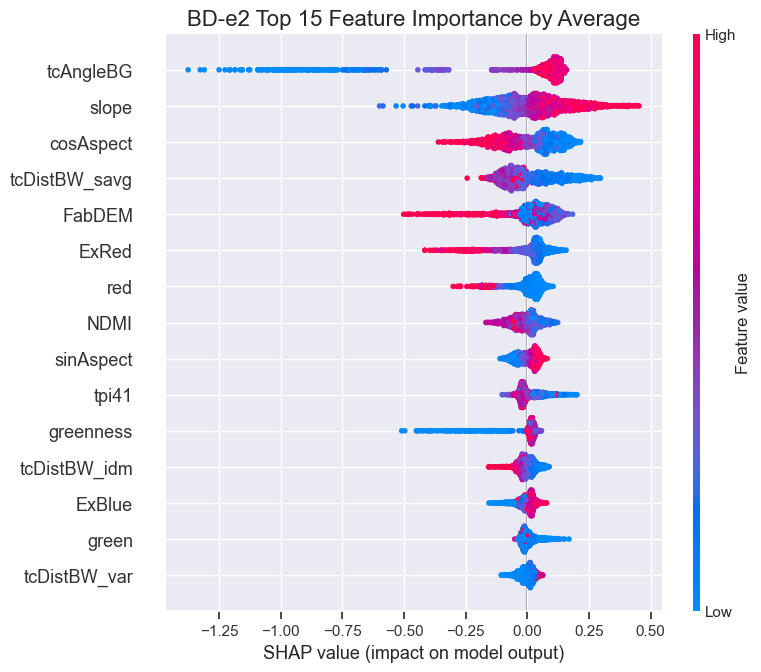

In [484]:
plt.title("BD-e2 Top 15 Feature Importance by Average", fontsize=16)
shap.plots.beeswarm(shap_values,max_display = 15,group_remaining_features=False)

In [486]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df

,DouglasFir,EVI,FabDEM,HStF,NBR,NDMI,Other_Hardwood,Red_Alder,Red_Cedar,SAVI,...,EVI_idm,EVI_imcorr1,EVI_savg,EVI_sent,EVI_var,HeatLoadIndex,GLI,ExBlue,ExGreen,ExRed
0,0.010724,0.006792,0.081634,0.023309,-0.049217,0.018022,0.0,-0.001974,0.000133,-0.011105,...,0.007367,-0.010866,0.000072,-0.002005,-0.036536,-0.012719,-0.006386,0.030234,0.000543,-0.156532
1,-0.040358,-0.014125,0.005944,-0.007196,-0.008215,-0.027419,0.0,-0.001758,0.000029,0.008155,...,0.002882,0.009890,-0.005945,-0.005399,0.030947,-0.000661,-0.027331,-0.039229,-0.005423,0.041697
2,-0.043012,0.014132,0.024125,-0.041473,-0.023811,-0.037219,0.0,-0.000643,-0.000189,0.005751,...,-0.004112,-0.006444,0.003744,-0.011013,0.013322,-0.011984,-0.008527,-0.037502,0.000168,0.057101
3,0.008533,0.000649,-0.283860,0.014857,-0.026145,0.014706,0.0,-0.000541,0.000148,0.011536,...,0.001646,0.010230,0.009729,0.005187,0.009589,-0.010645,0.009893,-0.037753,0.004846,-0.092655
4,-0.013799,0.018371,0.066085,-0.030513,-0.022178,0.038932,0.0,-0.000260,0.000046,0.010099,...,-0.000896,-0.002415,0.013698,-0.003196,0.015856,-0.014291,0.000343,-0.002609,-0.005100,0.058659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2398,-0.036257,-0.025621,0.073424,-0.018245,-0.007435,-0.026554,0.0,-0.000267,-0.000328,0.018267,...,-0.019627,-0.032284,0.001130,-0.019239,0.000672,0.002202,0.002461,0.010997,0.002421,0.040543
2399,0.009212,-0.019836,-0.016479,0.017272,-0.050943,-0.105585,0.0,-0.000661,-0.000153,0.009986,...,0.001363,0.011757,-0.011319,0.007101,0.009859,0.004590,0.012449,0.001700,0.005955,0.079501
2400,0.007740,0.021947,0.122500,0.007212,0.021877,0.036935,0.0,-0.000935,0.000150,0.016591,...,0.006719,0.006225,0.009428,-0.005907,-0.012131,0.010392,0.004684,0.010917,0.000727,0.011868
2401,0.005765,-0.023282,-0.004298,0.006955,-0.008849,-0.110854,0.0,-0.001255,-0.000115,0.006929,...,0.001851,0.015983,-0.014217,0.006098,0.012603,-0.007092,-0.002280,-0.014683,-0.000348,0.094086


In [487]:
temp00 = pd.DataFrame(shap_df.mean(0),columns=['shapMean']).reset_index(names='preds')
temp01 = pd.DataFrame(shap_df.max(0),columns=['shapMax']).reset_index(names='preds')
temp02 = pd.DataFrame(shap_df.min(0),columns=['shapMin']).reset_index(names='preds')

temp03 = pd.DataFrame(shap_df.abs().mean(0),columns=['absMean']).reset_index(names='preds') #importance by average
temp04 = pd.DataFrame(shap_df.abs().max(0),columns=['absMax']).reset_index(names='preds') # Importance by magnitude

shapSummarydf = pd.merge(temp00,temp01,on='preds')
shapSummarydf = pd.merge(shapSummarydf,temp02,on='preds')
shapSummarydf = pd.merge(shapSummarydf,temp03,on='preds')
shapSummarydf = pd.merge(shapSummarydf,temp04,on='preds')
shapSummarydf.sort_values(by='absMean', ascending = False)

,preds,shapMean,shapMax,shapMin,absMean,absMax
22,tcAngleBG,0.023677,0.159864,-1.375027,0.160144,1.375027
19,slope,0.001656,0.453511,-0.598911,0.118319,0.598911
11,cosAspect,0.007134,0.216642,-0.360579,0.096399,0.360579
32,tcDistBW_savg,0.005964,0.296908,-0.243835,0.083053,0.296908
2,FabDEM,0.016405,0.183695,-0.501231,0.072052,0.501231
51,ExRed,0.008829,0.157305,-0.415913,0.063982,0.415913
17,red,0.006687,0.105093,-0.300517,0.041229,0.300517
5,NDMI,-0.006213,0.123722,-0.167738,0.039293,0.167738
18,sinAspect,-0.000730,0.080287,-0.110700,0.033987,0.110700
38,tpi41,0.006928,0.201832,-0.102226,0.031835,0.201832


In [488]:
plusSHAP =shapSummarydf[(shapSummarydf["shapMax"]>0)]
plusSHAP = plusSHAP.sort_values(by="shapMax",ascending=False)

negSHAP =shapSummarydf[(shapSummarydf["shapMin"]<0)]
negSHAP['shapMinAbs'] = negSHAP['shapMin'].abs()
negSHAP.sort_values(by="shapMin",ascending=True)


,preds,shapMean,shapMax,shapMin,absMean,absMax,shapMinAbs
22,tcAngleBG,0.023677,0.159864,-1.375027,0.160144,1.375027,1.375027
19,slope,0.001656,0.453511,-0.598911,0.118319,0.598911,0.598911
13,greenness,0.004210,0.057682,-0.509199,0.031692,0.509199,0.509199
2,FabDEM,0.016405,0.183695,-0.501231,0.072052,0.501231,0.501231
51,ExRed,0.008829,0.157305,-0.415913,0.063982,0.415913,0.415913
11,cosAspect,0.007134,0.216642,-0.360579,0.096399,0.360579,0.360579
17,red,0.006687,0.105093,-0.300517,0.041229,0.300517,0.300517
32,tcDistBW_savg,0.005964,0.296908,-0.243835,0.083053,0.296908,0.243835
9,SAVI,0.001929,0.033070,-0.200937,0.019385,0.200937,0.200937
5,NDMI,-0.006213,0.123722,-0.167738,0.039293,0.167738,0.167738


<Axes: xlabel='shapMax', ylabel='preds'>

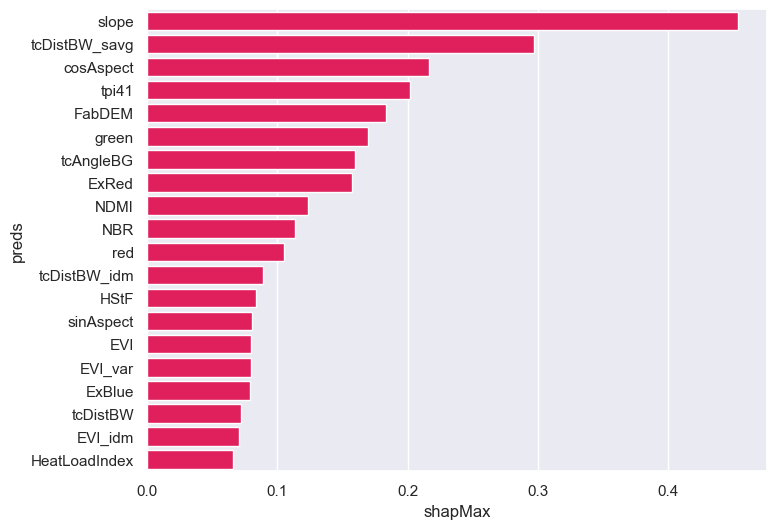

In [489]:
plusSHAP_Top = plusSHAP.nlargest(20, 'shapMax')
sns.barplot(x="shapMax", y="preds", data=plusSHAP_Top, color=shap.plots.colors.red_rgb)

<Axes: xlabel='shapMinAbs', ylabel='preds'>

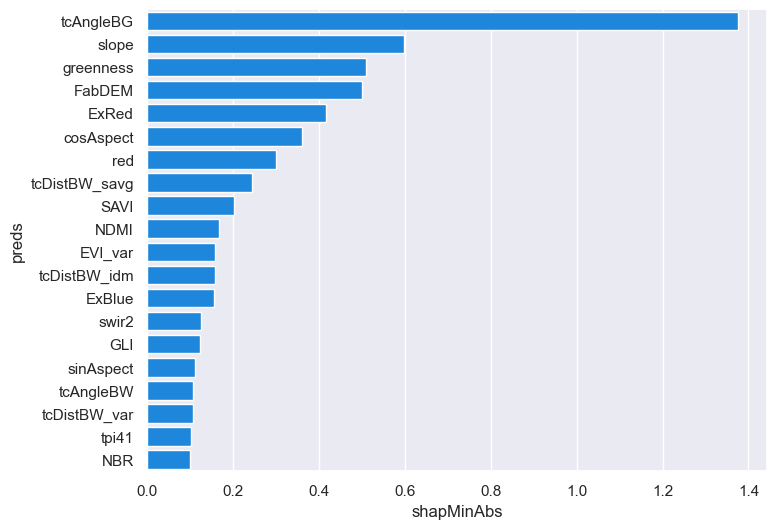

In [490]:
negSHAP_Top = negSHAP.nlargest(20, 'shapMinAbs')
sns.barplot(x="shapMinAbs", y="preds", data=negSHAP_Top, color=shap.plots.colors.blue_rgb)

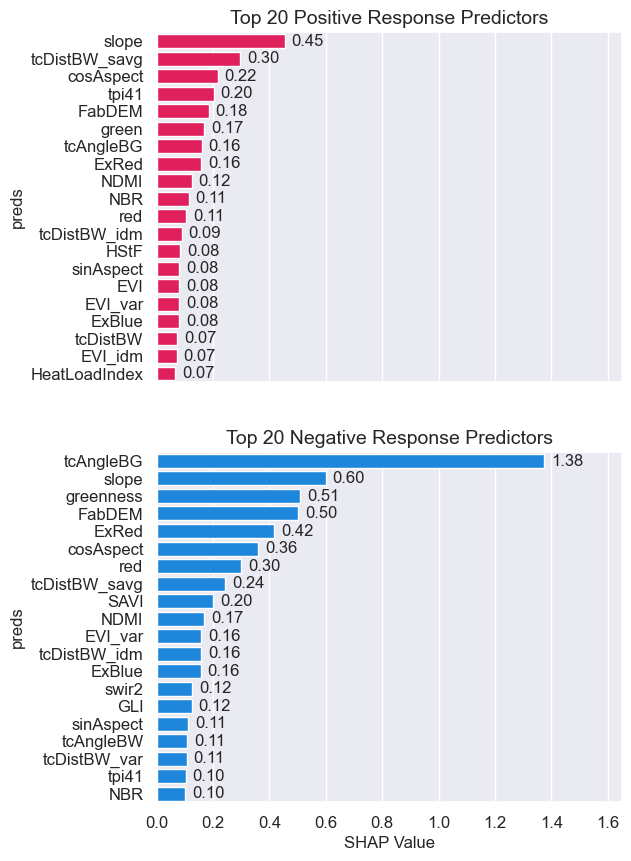

In [493]:
plusSHAP_Top = plusSHAP.nlargest(20, 'shapMax')
negSHAP_Top = negSHAP.nlargest(20, 'shapMinAbs')

fig, (ax, ax2) = plt.subplots(nrows=2, figsize=(6, 10), sharex=True)
sns.barplot(x="shapMax", y="preds", data=plusSHAP_Top, color=shap.plots.colors.red_rgb, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f', padding = 5, size=12)
ax.margins(x=.2)

ax.set_title(f"Top 20 Positive Response Predictors", fontsize=14)
# ax.set_xlabel(f'Max SHAP Value', fontsize = 14)
# ax.set_ylabel(f'Feature', fontsize = 14)
ax.tick_params(labelsize = 12)
# ax.set_xticklabels(fontsize = 14)
# ax.set_yticklabels(fontsize = 14)
# plt.show()

# fig, ax = plt.subplots(figsize=(6, 4))


sns.barplot(x="shapMinAbs", y="preds", data=negSHAP_Top, color=shap.plots.colors.blue_rgb, ax=ax2)
ax2.bar_label(ax2.containers[0], label_type='edge', fmt = '%.2f', padding = 5, size=12)
ax2.margins(x=.2)
ax2.tick_params(labelsize = 12)

plt.title(f"Top 20 Negative Response Predictors", fontsize=14)
plt.xlabel(f'SHAP Value', fontsize = 12)
# # plt.ylabel(f'Feature', fontsize = 14)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)
plt.show()

#### Finally, lets subset the predictors based on the magnitude of the Top 20 predictor contributiosn in both catergories

In [498]:
plusList = list(plusSHAP_Top['preds'])
negList = list(negSHAP_Top['preds'])

finalPred = list(set(plusList+negList))
print(len(finalPred))
finalPred

26


['EVI',
 'tcDistBW_idm',
 'FabDEM',
 'tpi41',
 'GLI',
 'tcDistBW_savg',
 'NBR',
 'red',
 'tcDistBW',
 'tcDistBW_var',
 'NDMI',
 'EVI_var',
 'cosAspect',
 'EVI_idm',
 'ExBlue',
 'greenness',
 'green',
 'tcAngleBG',
 'SAVI',
 'swir2',
 'sinAspect',
 'slope',
 'ExRed',
 'HeatLoadIndex',
 'HStF',
 'tcAngleBW']

# Save Data
Preliminary models have been completed. Save the following data:
- Training/Testing Data (for your records)
- ML Model (for your records)
- Final Predictor List (Important!!)


In [503]:
mX = "M0"
transform = "log"
date = '20250328'
algo = 'LightGBM_DART'

outDir = f"D:/TO17/^^ExtraExtra/GEDI/HpmGuideMod/models/prelim/{algo}"

outArray = os.path.join(outDir, f"{mX}_y_pred_{transform}_{algo}.npy")
outArrayTr = os.path.join(outDir, f"{mX}_y_pred_train_{transform}_{algo}.npy")

np.save(outArray, y_pred_lgbm) # save # save
np.save(outArrayTr, y_pred_train_lgbm) # save # save

# save the model to disk
filename = os.path.join(outDir,f'prelim{mX}_GEDI_EE_Kenobi_{algo}_{transform}_{date}.sav')
joblib.dump(lgbm_final_model, filename) #xgb_final_model # xgb_model

# save the final predictor list as csv
outCSVName = f"{algo}_FinalPredictors_{date}.csv"
outPathCSV = os.path.join(outDir,outCSVName)
finalList_df = pd.DataFrame(finalPred,columns=['impPreds'])
finalList_df.to_csv(outPathCSV, index=False)

### Part 03 Complete:
Move on to ML Part 04